date: 01/15/2020

In [2]:
'''load libraries'''
import numpy as np #numerical computing
import pandas as pd #data frames
import matplotlib.pyplot as plt #plotting

# 1. Intro to Linear Regression and Linear Models

## 1.1 A First Example: The Song of Insects

The following data (from *The Song of Insects* by George W. Pierce, 1948) shows the relationship between chirps (pulses of sound) per second of a cricket and the corresponding ground temperature (measured in degrees Farenheit).

In [3]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/cricket.csv' #Github repository
data = pd.read_csv(url) #read data, put it into a pandas dataframe
data

,Chirps/Second,Temperature (F)
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


Let us plot the data

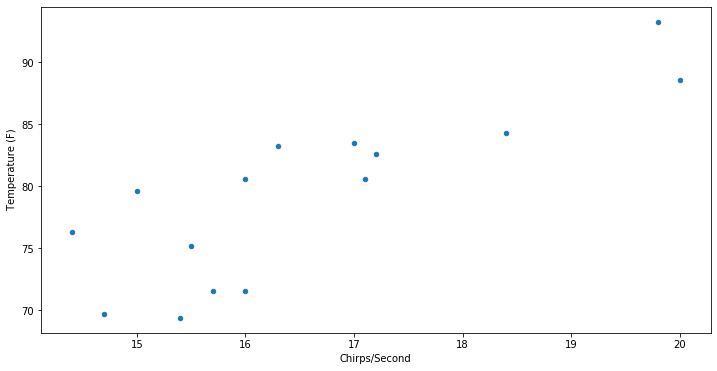

In [4]:
data.plot(kind='scatter',x=data.columns[0],y=data.columns[1],
          figsize=(12,6)) #Make plot of the dataframe using matplotlib

The plot shows that the two variables  are roughly correlated: the higher the temperature, the faster the crickets chirp.  We can quantify this by attempting to fit a **linear model**
$$
  \mbox{temperature} = \theta_0 + \theta_1 \cdot \mbox{chirps} = \begin{bmatrix} 1 & \mbox{chirps} \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix},
$$
where $\theta_0$ and $\theta_1$ are the model parameters.

## 1.2 Training the Linear Model

Training a model means setting its parameters so that the model best fits the data set. For this purpose, we first need a measure of how well (or poorly) the model fits the data.

## 1.3 Objective Function (Cost Function): The mean square error

The most common performance measure of a linear model is the **mean square error (MSE)**.
\begin{equation}\label{eq:MSE}
\mathrm{MSE}(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m \left(\mathrm{temperature}_i - (\theta_0 + \theta_1\cdot\mathrm{chirps}_i) \right)^2,
\end{equation}
where $m$ is the number of data points (in our first example, $m=15$).
We need to find the values of $\alpha$ and $\beta$ that minimize the MSE.

Using Linear Algebra notation, we can write the MSE as $\mathrm{MSE} = \| y - X\theta\|_2^2/m$, where

$$
y = 
\begin{bmatrix}
\mathrm{temperature}_1\\ \mathrm{temperature}_2 \\ \vdots \\ \mathrm{temperature}_m
\end{bmatrix} =
\begin{bmatrix}
88.6 \\ 71.6 \\ \vdots \\ 76.3
\end{bmatrix}, \quad \quad
X =
\begin{bmatrix}
1 & \mathrm{chirps}_1 \\ 1 & \mathrm{chirps}_2 \\ \vdots & \vdots \\ 1 & \mathrm{chirps}_m
\end{bmatrix} =
\begin{bmatrix}
1 & 20.0 \\
1 & 16.0 \\
\vdots & \vdots \\
1 & 14.4
\end{bmatrix} \quad \quad \mbox{and} \quad \quad 
\theta =
\begin{bmatrix}
\theta_0 \\ \theta_1
\end{bmatrix}.
$$ 


Our goal is to find the vector $\theta\in\mathbb{R}^2$ that solves the following **unconstrained optimization** problem

$$
\min_\theta \|y-X\theta\|_2^2.
$$

This optimization problem is our first example of a **strongly convex optimization problem**. 

## 1.3 Least Squares Problems and the Normal Equations

**least squares problem**: Given a vector $y$ and a (tall and skinny) matrix $A$, find the vector $\theta$ that makes

$$ \|y-X\theta\|_2^2 $$

as small as possible.

From Linear Algebra: The (unique) vector $\theta$ that minimizes $\|y-X\theta\|_2^2$ satisfies the **normal equations**

$$
X^TX\, \theta = X^Ty.
$$

## 1.4 Three Ways of Solving the Normal Equations 

In [5]:
y = data.to_numpy()[:,1]
x = data.to_numpy()[:,0]
X = np.c_[np.ones((len(x),1)),x]

### 1.4.1 Matrix Inverse

As you learned in Linear Algebra, if the columns of $X$ are linearly independent, then the matrix $X^TX$ is invertible. In this case, the vector $\theta$  that minimizes the cost function is given by

$$
\theta = (X^TX)^{-1}X^Ty.
$$

In [6]:
theta = np.linalg.inv(X.T@X)@(X.T@y) #solve the normal equations
theta[0],theta[1]

(22.84898230806448, 3.4103229995131983)

### 1.4.2 QR decomposition

If the columns of $X$ are linearly independent, then the matrix $X$ can be factored as

$$ X = QR $$,

where $Q$ has orthonormal columns ($Q^TQ=I$) and $R$ is upper triangular and invertible.

In [7]:
Q,R = np.linalg.qr(X)

In [8]:
np.around(Q.T@Q,decimals=10)

array([[ 1., -0.],
       [-0.,  1.]])

In [9]:
R

array([[ -3.87298335, -64.1624241 ],
       [  0.        ,   6.40884805]])

The normal equations become

$$ R\theta = Q^Ty \quad \quad \mbox{(upper triangular linear system)} $$

In [10]:
theta = np.linalg.solve(R,Q.T@y)
theta[0],theta[1]

(22.848982308066873, 3.4103229995130664)

### 1.4.3 Reduced Singular Value Decomposition (SVD)

If the columns of $X$ are linearly independent, thenthe matrix $X$ can be factored as

$$
X = U\Sigma V^T,
$$

where the columns of $U$ are orthonormal ($U^TU = I$), $\Sigma$ is diagonal and invertible, and $V$ is orthogonal ($V^{-1}=V^T$).

In [11]:
U,S,V = np.linalg.svd(X,full_matrices=False)

In [12]:
S = np.diag(S)
S

array([[64.59676734,  0.        ],
       [ 0.        ,  0.38425083]])

In [13]:
np.around(V.T@V,decimals =10)

array([[1., 0.],
       [0., 1.]])

In [14]:
np.around(U.T@U,decimals=10)

array([[ 1., -0.],
       [-0.,  1.]])

The normal equations become

$$ \theta = V\Sigma^{-1} U^T y $$

In [15]:
theta = V@np.linalg.inv(S)@U.T@y
theta

array([22.84898231,  3.410323  ])

### 1.5 Making predictions

Now, we can use our linear model 

$$
\mbox{temperature} =\beta + \alpha \cdot \mbox{chirps}
$$

to make predictions.

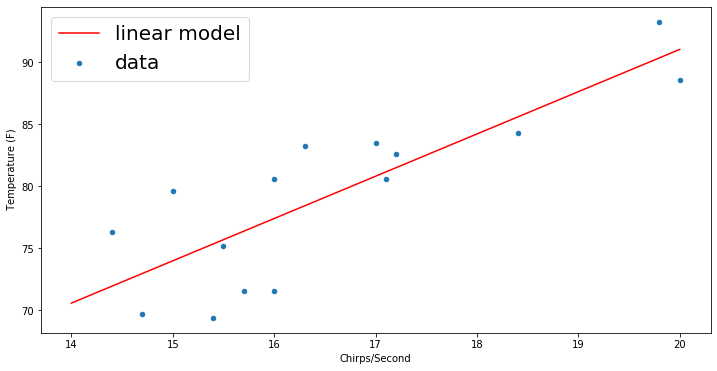

In [16]:
data.plot(kind='scatter',x=data.columns[0],y=data.columns[1],
          figsize=(12,6),label = 'data') #plot data
x_plot = np.linspace(14, 20, 1000) #plot interpolation line
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-',label='linear model')
plt.legend(fontsize=20)

Text(0, 0.5, 'Temperature')

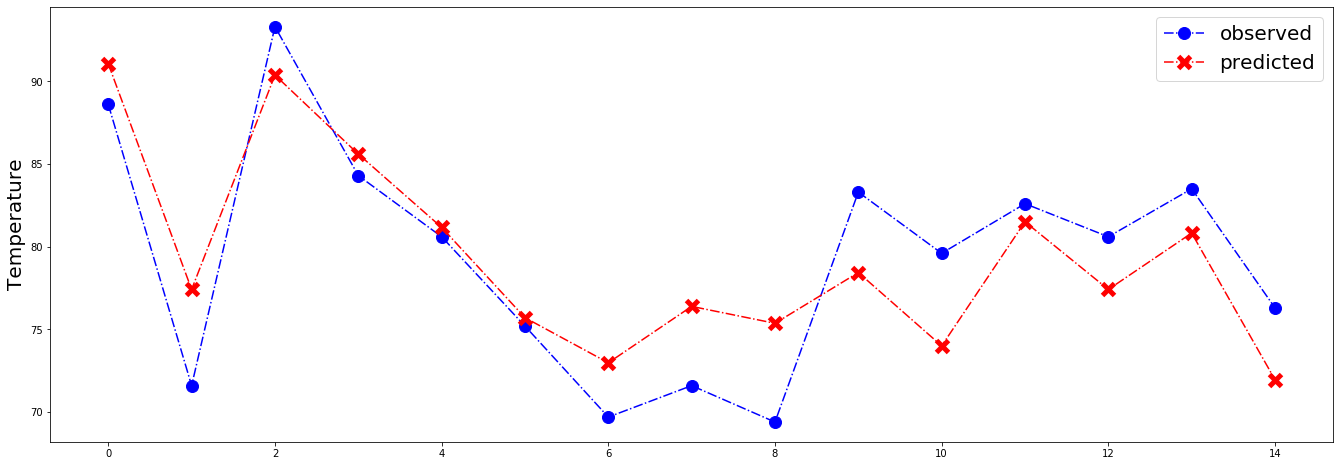

In [17]:
plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=12,label='observed')
y_predict = X.dot(theta)
plt.plot(y_predict,'rx-.',markersize=12,markeredgewidth=5,label='predicted')
plt.legend(fontsize=20)
plt.ylabel('Temperature',fontsize=20)
#plt.legend(['observed','predicted'])

## 1.6 Least Squares Problems: Normal equations vs Singular Value Decomposition

In [33]:
'''Least squares problem with known solution'''
m = 50
X = np.random.randn(m, 5) # mx5 random matrix
theta = np.array([1,2,3,4,5]).T
y = X@theta

In [34]:
'''Least squares solution using the normal equations'''
theta_Neq = np.linalg.inv(X.T@X)@X.T@y
theta_Neq

array([1., 2., 3., 4., 5.])

In [39]:
'''Least squares solution using the reduced SVD'''
theta_SVD = np.linalg.lstsq(X,y,rcond=None)[0] #numpy built-in function to solve least squares problems based on the reduced SVD
theta_SVD

array([1., 2., 3., 4., 5.])

In [56]:
'''Let us add a column that is almost a linear combination of the other columns'''
new_column = X[:,1]+X[:,2]-X[:,3]+ 1e-13*np.random.randn(len(X))
X_new = np.c_[X, new_column] #The exact solution of the least square problem is [1,2,3,4,5,0]^T
X_new.shape

(50, 6)

In [57]:
theta_Neq = np.linalg.inv(X_new.T@X_new)@X_new.T@y
theta_Neq

array([ 2.01895383,  5.67969146, 14.31665965, -0.99775556,  5.        ,
       -5.60594729])

In [58]:
theta_SVD = np.linalg.lstsq(X_new,y,rcond=None)[0]
theta_SVD

array([ 1.00000000e+00,  2.00095546e+00,  3.00095546e+00,  3.99904454e+00,
        5.00000000e+00, -9.55463235e-04])

The solution obtained by the SVD approach is more accurate than the solution obtained by solving the normal equations! The normal equations approach is more sensitive to (tiny) roundoff errors

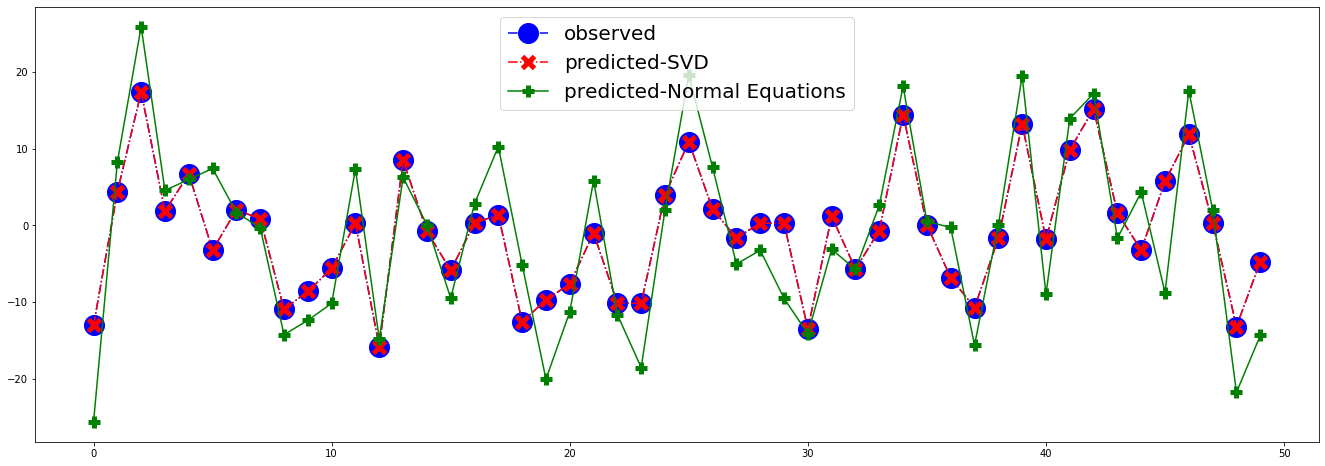

In [59]:
y_predicted_SVD = X_new@theta_SVD
y_predicted_Neq = X_new@theta_Neq
plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=20,label='observed')
y_predict = X.dot(theta)
plt.plot(y_predicted_SVD,'rx-.',markersize=12,markeredgewidth=5,label='predicted-SVD')
plt.plot(y_predicted_Neq,'g+-',markersize=12,markeredgewidth=5,label='predicted-Normal Equations')
plt.legend(fontsize=20)

## 1.5 Polynomial Fitting

We’ll use a regression model to predict body fat percentage based on body mass index (BMI). The data includes height, weight, and body fat.

In [3]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/Predict_BMI.csv' #Github repository
data = pd.read_csv(url) #pandas data frame
data.head(10) #first 10 rows of the dataframe

,Height M,Weight kg,BMI,%Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5
5,1.60655,52.616718,20.386152,22.1
6,1.56210,47.967396,19.657509,19.6
7,1.49860,45.586036,20.298333,25.3
8,1.52400,47.853998,20.603846,22.8
9,1.47955,44.452055,20.306382,26.4


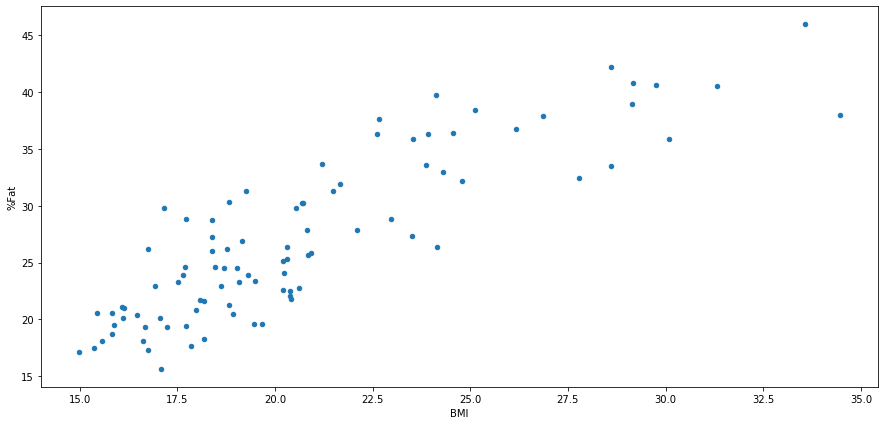

In [69]:
data.plot(kind='scatter',x = data.columns[2],y=data.columns[3],figsize=(15,7))
plt.xlabel('Body mass index',fontsize=20)
plt.ylabel('body fat percentage',fontsize=20)

The plot shows that the two variables are roughly correlated: the higher the BMI, the higher is the %Fat. We can quantify this by attempting to fit a linear model

$$ %display-math mode in LaTeX
  \mbox{%Fat} =\theta_0 + \theta_1 \cdot \mbox{BMI},
$$

In [74]:
y = data.to_numpy()[:,3]
x = data.to_numpy()[:,2]
X = np.c_[np.ones((len(x),1)),x]
theta = np.linalg.lstsq(X,y,rcond=None)[0] #solve the normal equations
theta

array([-2.53463574,  1.42455842])

Text(0.5, 1.0, 'MSE=0.37468859717597014')

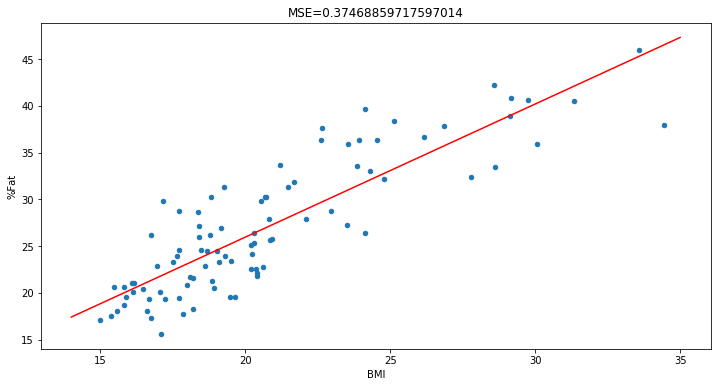

In [86]:
'''Plot the data and the fitted line'''
data.plot(kind='scatter',x = data.columns[2],y=data.columns[3],figsize=(12,6))
x_plot = np.linspace(14, 35, 1000) #1000 evenly spaced numbers over [14,35]
y_plot = theta[0]+theta[1]*x_plot
plt.plot(x_plot,y_plot,'r-')
MSE = np.linalg.norm(X@theta-y)/len(y) #Mean squares error
plt.title('MSE='+str(MSE))

We can add powers of the BMI variable to our linear model

$$
  \mbox{%Fat} =\theta_0 + \theta_1 \cdot \mbox{BMI}+\theta_2\cdot\mbox{BMI}^2,
$$

In [88]:
y = data.to_numpy()[:,3]
x = data.to_numpy()[:,2]
X = np.c_[np.ones((len(x),1)),x,np.square(x)]
theta = np.linalg.lstsq(X,y,rcond=None)[0]#solve the normal equations
theta

array([-23.18746064,   3.28574267,  -0.03998913])

Text(0.5, 1.0, 'MSE=0.3623864144232976')

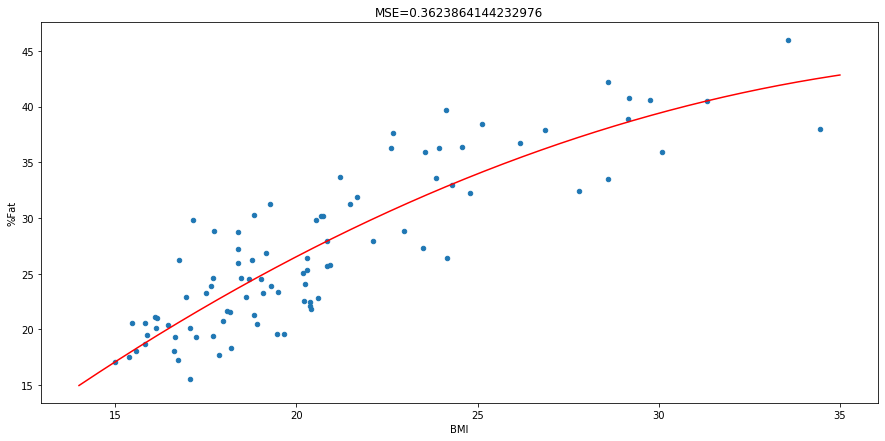

In [93]:
'''Plot the data and the fitted quadratic polynomial'''
data.plot(kind='scatter', x = data.columns[2],y=data.columns[3],figsize=(15,7))
x_plot = np.linspace(14,35,1000)
y_plot = theta[0]+theta[1]*x_plot+theta[2]*np.square(x_plot)
plt.plot(x_plot,y_plot,'r-')
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE))

## Multiple Regression 

The dataset "cereals" contains, among other variables, the Consumer Reports ratings of 77 cereals and the number of grams of sugar contained in each serving. 

In [4]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/cereal.csv'
data = pd.read_csv(url,index_col='name')
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


 Let's fit a linear model
 
 $$
 \mbox{rating} = \theta_0 + \theta_1\cdot \mbox{sugars} 
 $$

In [165]:
x = data.to_numpy()[:,8].astype(float)
y = data.to_numpy()[:,14].astype(float)
X = np.c_[np.ones((len(x),1)),x]
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([59.28436737, -2.40081989])

Text(0.5, 1.0, 'MSE=1.0342476777360836')

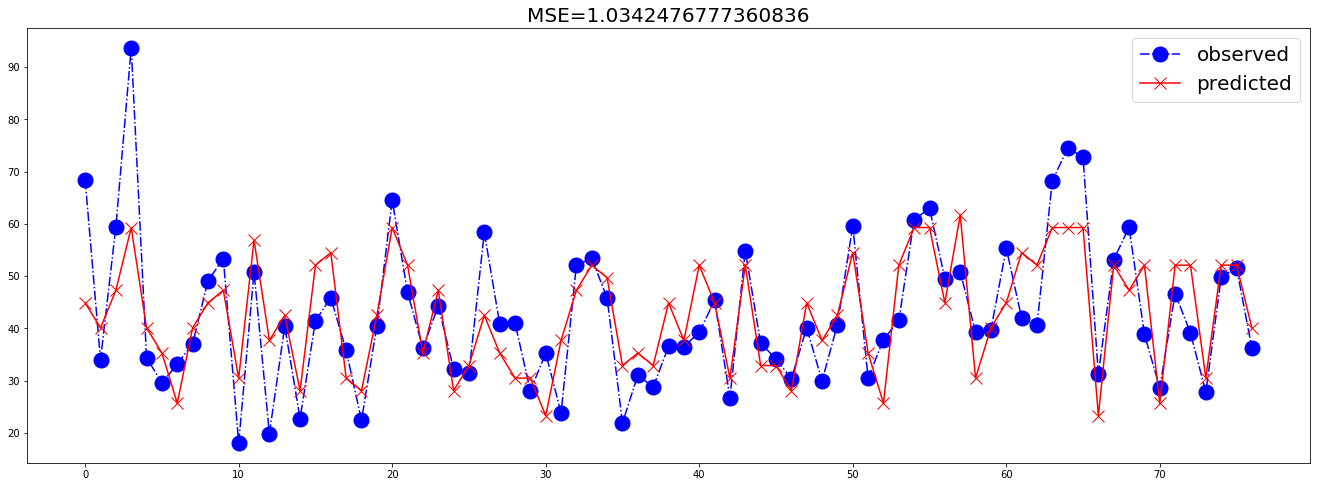

In [166]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=15,label='observed')
plt.plot(y_predicted,'r-x',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Let's add fat to our linear model
 
 $$
 \mbox{rating} = \theta_0 + \theta_1\cdot \mbox{sugars} + \theta_2\cdot \mbox{fat}
 $$

In [167]:
new_col = data.to_numpy()[:,4].astype(float)
X = np.c_[X,new_col]
X.shape

(77, 3)

In [168]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([61.0886002 , -2.21281821, -3.06577983])

Text(0.5, 1.0, 'MSE=0.978046492583232')

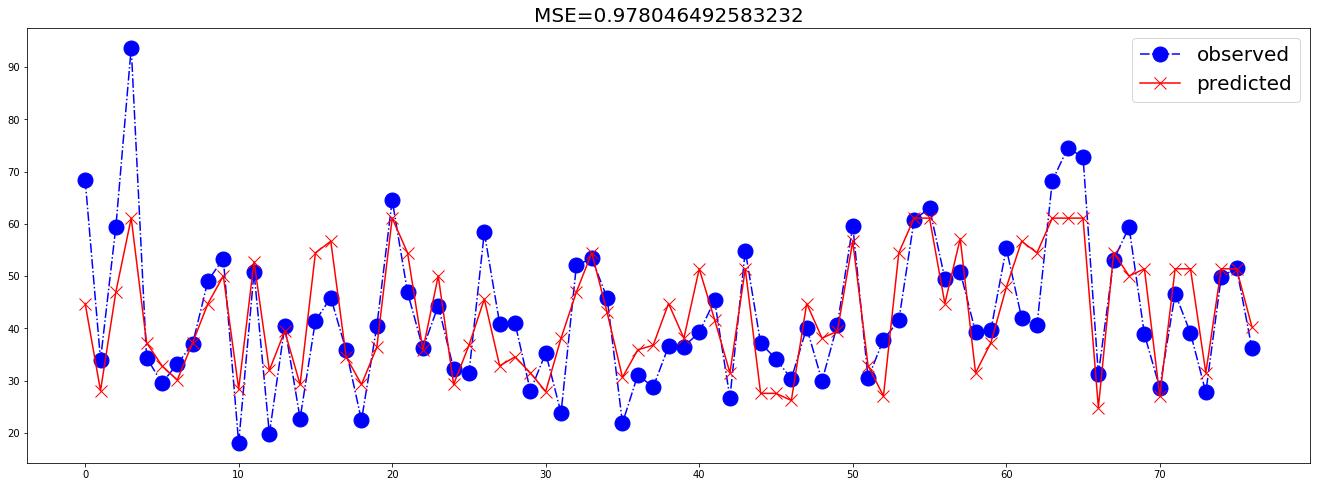

In [163]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

Let's add fiber to our linear model

In [174]:
new_col = data['fiber'].to_numpy()
X = np.c_[X,new_col]
X.shape

(77, 4)

In [175]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([53.43720311, -1.9640234 , -3.48015221,  2.95033789])

Text(0.5, 1.0, 'MSE=0.5809236937761807')

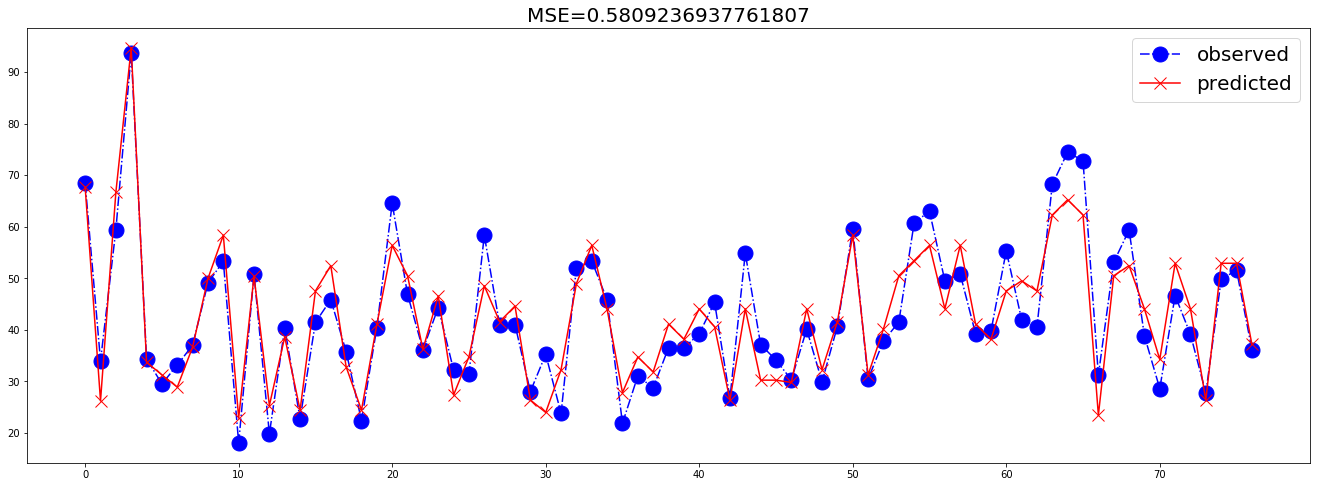

In [176]:
y_predicted = X@theta
plt.figure(figsize=(23,8))
plt.plot(y,'bo-.',markersize=15,label='observed')
plt.plot(y_predicted,'rx-',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)